# Analysis of Stackoverflow Survery 2020

In this project I'll analyze the developer suervey from Stackoverflow 2020. I try to answer a couple of questions that are most interesting to me. First of all, I'm interested in _who is a typical developer?_

Secondly, I'll analyze _why someone might want to become a developer?_ What are the factors that makes it attractive? And lastly, I'll see _what technologies are more in demand_ by analyzing what it is that these developers have in mind for further professional development.   

The goal is to shed some light about this market, and possibly help junior developers and those interested to start their career as a developer.

Disclaimer: this is not supposed to be a thorough analysis of the data, rather to satisfy some curiosity by answering few questions. However, the insights gained could help individuals as well as organizations.

## Import the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Helper Functions

In [2]:
def get_freq(df, col):
    """Return a frequency table of the feature."""
    s = (df[col].value_counts(dropna= False) / len(df)).round(2)
    return s

In [3]:
def clean_and_plot(df, col,
                   drop_na= True,
                   plot= False,
                   title= None):
    """ Clean multiple responses, create frequency table.
    
    Arguments:
    -----------------
    :df {DataFrame} The dataframe containing the survey results.
    :col {str} a column name in the df.
    :drop_na {bool} if True, ignore NAs from analysis.
    :plot {bool} if True, show a barplot of the frequency table. 
    
    Return:
    -----------------
    :res {Series} value counts of the responses.
    """
    ans = df[col].dropna(axis= 0).values
    ans_str = ';'.join(ans).lower()
    ans_lst = ans_str.split(';')
    res = pd.DataFrame(ans_lst)
    res.columns = [col]
    # Get the frequency table
    res = get_freq(res, col)
    
    if plot:
        plt.figure(figsize= (8, 5), dpi= 100)
        plt.bar(res.index, res.values)
        plt.xticks(rotation= 'vertical')
        if title:
            plt.title(title)
        else:
            plt.title(col)
            
        plt.show()
    
    return res


In [4]:
def cross_tab(df, col1, col2):
    """ Create marginal table of comparison between two features.
    
    Arguments:
    ----------
    :df {DataFrame} 
    :col1 {str} a feature from the df
    :col2 {str} a different feature from the df than col1
    
    Return:
    ----------
    :res {DataFrame} frequency table
    """
    res = pd.crosstab(index= df[col1], columns= df[col2], margins= True)
    res = res.div(res.All, axis=0).round(2).drop('All', axis= 1)
    return res


## Read the data

In [5]:
# The survery response is consisted of about 64.5K developers.
# with 60 questions being asked from them.
df = pd.read_csv('./data/survey_results_public.csv')
df.shape

(64461, 61)

There are 64,461 respondants in the dataset, with 60 questions being asked of them.

In [6]:
# The schema of the questionaire. 
# Provides more information about the columns in the survey response.
dfschema = pd.read_csv('./data/survey_results_schema.csv')
dfschema.shape

(61, 2)

In [7]:
dfschema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


In [8]:
# Show the columns in the survey response.
# N.B. I'm not going to analyze all these columns.
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

### Overview of the survey responders.

In [9]:
((df['Country'].value_counts() / len(df)).round(2)).head(20)

United States         0.19
India                 0.13
United Kingdom        0.06
Germany               0.06
Canada                0.03
France                0.03
Brazil                0.03
Netherlands           0.02
Poland                0.02
Australia             0.02
Spain                 0.02
Italy                 0.02
Russian Federation    0.02
Sweden                0.01
Pakistan              0.01
Turkey                0.01
Israel                0.01
Switzerland           0.01
Bangladesh            0.01
Romania               0.01
Name: Country, dtype: float64

In [10]:
# How many different countries are in the dataset?
len(set(df['Country']))

184

Right off the bat we see that about 1/5 of responders live in the US. And although 184 countries are represented in the survey, almost 60% of the responders are from 10 countries. 

In [11]:
(df['Gender'].value_counts(dropna= False) / len(df)).round(2)

Man                                                            0.71
NaN                                                            0.22
Woman                                                          0.06
Non-binary, genderqueer, or gender non-conforming              0.01
Man;Non-binary, genderqueer, or gender non-conforming          0.00
Woman;Non-binary, genderqueer, or gender non-conforming        0.00
Woman;Man                                                      0.00
Woman;Man;Non-binary, genderqueer, or gender non-conforming    0.00
Name: Gender, dtype: float64

Sadly, but not surprisingly - which is even more sad, vast majority of the respndants are male, 71% of them. And although only 6% are women, we have to remember that 22% did not answer this question.

## Q1: What's an average developer look like?

In [12]:
df['MainBranch'].head()

0                       I am a developer by profession
1                       I am a developer by profession
2                          I code primarily as a hobby
3                       I am a developer by profession
4    I used to be a developer by profession, but no...
Name: MainBranch, dtype: object

In [13]:
(df['MainBranch'].value_counts()/ len(df)).round(2)

I am a developer by profession                                                   0.73
I am a student who is learning to code                                           0.12
I am not primarily a developer, but I write code sometimes as part of my work    0.09
I code primarily as a hobby                                                      0.04
I used to be a developer by profession, but no longer am                         0.02
Name: MainBranch, dtype: float64

From the above result we see that 75% of the respondants, that's 47,193 people, are developer by profession. I'll focus my analysis to those. I'll do not include those who used to be a developer. 

In [14]:
dfdev = df.loc[df['MainBranch'] == 'I am a developer by profession']
dfdev.shape

(47193, 61)

In [15]:
# How important is a formal education,
# such as a university degree in computer science, to your career?
get_freq(dfdev, 'NEWEdImpt')

Fairly important                      0.24
Very important                        0.21
Somewhat important                    0.21
Not at all important/not necessary    0.14
NaN                                   0.12
Critically important                  0.08
Name: NEWEdImpt, dtype: float64

In [16]:
# Which of the following best describes
# the highest level of formal education that you've completed?
get_freq(dfdev, 'EdLevel')

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.46
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       0.23
Some college/university study without earning a degree                                0.10
NaN                                                                                   0.09
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.04
Associate degree (A.A., A.S., etc.)                                                   0.03
Other doctoral degree (Ph.D., Ed.D., etc.)                                            0.02
Professional degree (JD, MD, etc.)                                                    0.01
I never completed any formal education                                                0.01
Primary/elementary school                                                             0.00
Name: EdLevel, dtype: float64

At first glance, we notice that almost 3/4 of the respondants have some form of university degree, almost half the respondants have at least a bachelor. And more than half the respondance see formal education an important asset. Let's break this down a bit more.

In [17]:
# To make the analysis easier, I'll map the education level into 4 categories:
# 1. no college 2. some college 3. bachelor. 4. grad
# I won't modify the non-responders' value. NaN remains NaN.

map_edu = {'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'bachelor',
           'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'grad',
           'Some college/university study without earning a degree': 'some-college',
           'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'no-college',
           'Associate degree (A.A., A.S., etc.)': 'some-college',
           'Other doctoral degree (Ph.D., Ed.D., etc.)': 'grad',
           'Primary/elementary school': 'no-college',
           'Professional degree (JD, MD, etc.)': 'no-college',
           'I never completed any formal education': 'no-college'
          }

df['degree'] = df['EdLevel'].map(map_edu)

In [18]:
# Again, more than 3/4 have some form of university education.
get_freq(df, 'degree')

bachelor        0.41
grad            0.23
some-college    0.14
NaN             0.11
no-college      0.11
Name: degree, dtype: float64

Let's see, how various groups attach importance to the formal education's role in their career. 

In [19]:
cross_tab(df, 'degree', 'NEWEdImpt')

NEWEdImpt,Critically important,Fairly important,Not at all important/not necessary,Somewhat important,Very important
degree,,,,,
bachelor,0.09,0.29,0.12,0.24,0.26
grad,0.16,0.27,0.07,0.18,0.32
no-college,0.05,0.17,0.39,0.25,0.14
some-college,0.03,0.19,0.35,0.33,0.11
All,0.10,0.26,0.16,0.24,0.24


## Q2: Should you become a developer?

In [20]:
get_freq(df, 'Hobbyist')

Yes    0.78
No     0.22
NaN    0.00
Name: Hobbyist, dtype: float64

Interesting, 77% of the people who "are developer by profession" also responded that "they code as a hobby". I guess that's an ideal life. Your hobby is your profession. What do you want more?

In [21]:
# Job satisfaction is half half (not including the NaN)
get_freq(df, 'JobSat')

NaN                                   0.30
Very satisfied                        0.23
Slightly satisfied                    0.22
Slightly dissatisfied                 0.11
Neither satisfied nor dissatisfied    0.09
Very dissatisfied                     0.06
Name: JobSat, dtype: float64

In [22]:
get_freq(df, 'NEWOvertime')

NaN                                                         0.33
Sometimes: 1-2 days per month but less than weekly          0.18
Often: 1-2 days per week or more                            0.17
Occasionally: 1-2 days per quarter but less than monthly    0.15
Rarely: 1-2 days per year or less                           0.10
Never                                                       0.07
Name: NEWOvertime, dtype: float64

## Q3: What future technologies should you pay attention to?

This question could be of interest to both newcomers as well as professionals; especially newcomers could benefit from learning technologies that seem to be attractive or are gaining more popularity. Most importanly, this will show the potential employer that they pay attention to their own development and are aware of the job market/trends.

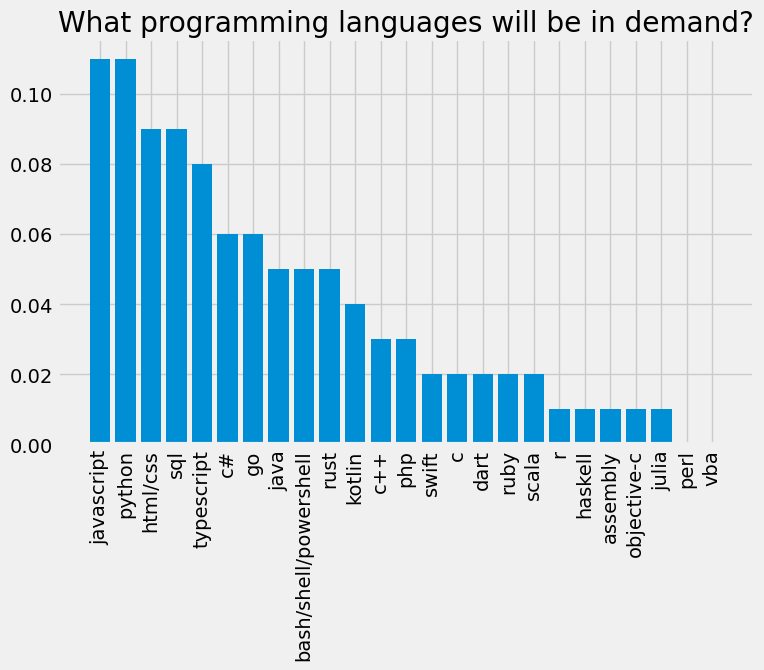

In [23]:
_ = clean_and_plot(dfdev, 'LanguageDesireNextYear',
                   plot= True,
                   title= 'What programming languages will be in demand?')

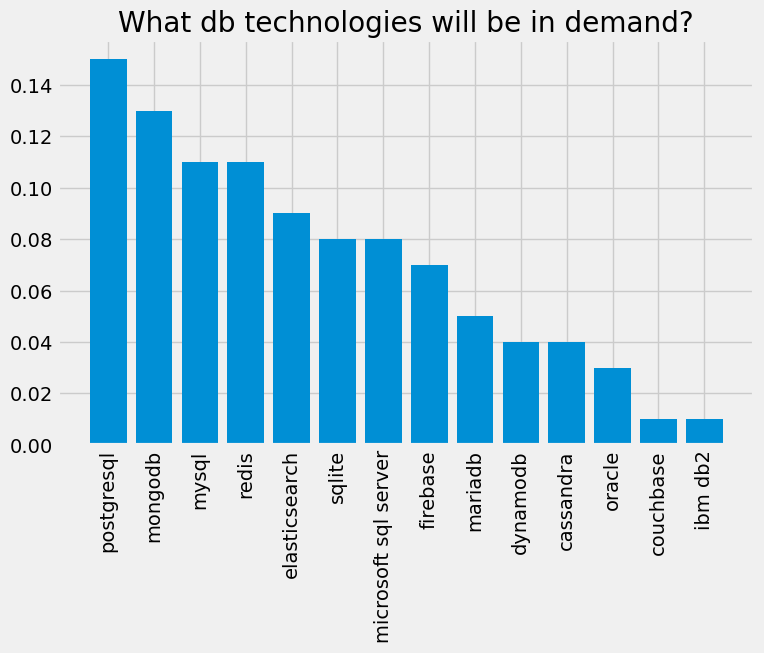

In [24]:
_ = clean_and_plot(dfdev, 'DatabaseDesireNextYear',
                   plot= True,
                   title= 'What db technologies will be in demand?')

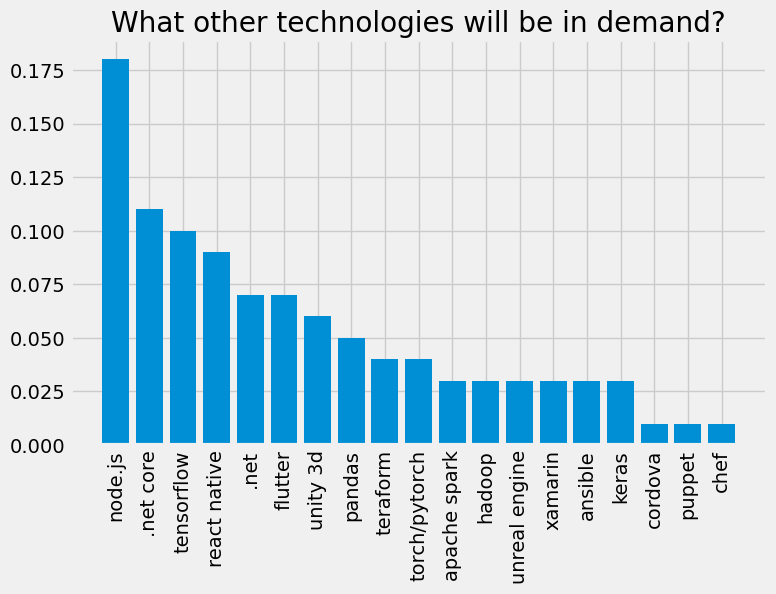

In [25]:
_ = clean_and_plot(dfdev, 'MiscTechDesireNextYear',
                   plot= True,
                   title= 'What other technologies will be in demand?')

So, if you want to be in demand in this market, focus on the followings: master `javascript` & `python` as your programming language; be comfortable with `postgre` & `mongodb`; last but not least, add these frameworks to your arsenal: `node.js` & `react` if you want to go into web development and `tensorflow` if you're more interested in ML and data science.  

### Pro Tip I: the Importance of DevOps

In [26]:
# Does your company have a dedicated DevOps person?
get_freq(dfdev, 'NEWDevOps')

Yes         0.36
No          0.36
NaN         0.18
Not sure    0.10
Name: NEWDevOps, dtype: float64

In [27]:
# How important is the practice of DevOps to scaling software development?
get_freq(dfdev, 'NEWDevOpsImpt')

Extremely important     0.39
Somewhat important      0.25
NaN                     0.20
Neutral                 0.13
Not very important      0.02
Not at all important    0.01
Name: NEWDevOpsImpt, dtype: float64

As someone who is somewhat experienced in this field, I can attest that proficiency with `DevOps` is becoming ever more important, as the above tables also indicate. If you really want to distinguish yourself from other candidates, you may also want to improve your skills in this area. Especially if you're going to - or are interested in - work in smaller companies. 

### Pro Tip II: the Importance of Communication Skills

Finally, remember that being a developer is especially a collaborative profession. You're always communicating with others - including _future you_. This happens sometimes with `code`, sometimes with writing `documents`, sometimes by `presenting your findings` etc.    

As you improve your technical prowess, keep in mind that __communication skill is more important than yet another programming language__. Good luck.